In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22748


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22743,2021-05-09,47,沖縄県,103,13084,0,138
22744,2021-05-10,47,沖縄県,36,13120,1,139
22745,2021-05-11,47,沖縄県,132,13252,0,139
22746,2021-05-12,47,沖縄県,109,13361,1,140
22747,2021-05-13,47,沖縄県,126,13487,0,140


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10648,7168,130
43,香川県,17908,1711,23
44,高知県,18876,1139,20
45,鳥取県,15004,422,2
46,鹿児島県,22264,2762,28


## 都道府県ごとの最新データを付与

In [4]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
22741,2021-05-07,47,沖縄県,82,12888,1,138,436.0
22742,2021-05-08,47,沖縄県,93,12981,0,138,424.0
22743,2021-05-09,47,沖縄県,103,13084,0,138,470.0
22744,2021-05-10,47,沖縄県,36,13120,1,139,449.0
22745,2021-05-11,47,沖縄県,132,13252,0,139,548.0
22746,2021-05-12,47,沖縄県,109,13361,1,140,594.0
22747,2021-05-13,47,沖縄県,126,13487,0,140,681.0


In [5]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数"]]
latest.head()

,都道府県名,直近1週間の感染者数
483,北海道,3228.0
967,青森県,194.0
1451,岩手県,115.0
1935,宮城県,234.0
2419,秋田県,108.0


In [6]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数
0,三重県,11616,4310,95,320.0
1,京都府,12584,14232,196,940.0
2,佐賀県,19844,2127,15,351.0
3,兵庫県,13552,36672,840,2816.0
4,北海道,484,28752,919,3228.0


## 人口データを付与

In [7]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [8]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口
0,三重県,11616,4310,95,320.0,1813859
1,京都府,12584,14232,196,940.0,2545899
2,佐賀県,19844,2127,15,351.0,823810
3,兵庫県,13552,36672,840,2816.0,5549568
4,北海道,484,28752,919,3228.0,5267762


## 人口当たりの感染者数

In [9]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,484,28752,919,3228.0,5267762,54.581054,545.810536,61.278395
41,青森県,968,1895,27,194.0,1275783,14.853623,148.536232,15.206348
19,岩手県,1452,1154,39,115.0,1235517,9.340220,93.402195,9.307844
11,宮城県,1936,8457,75,234.0,2292385,36.891709,368.917089,10.207709
36,秋田県,2420,650,9,108.0,985416,6.596199,65.961990,10.959838
15,山形県,2904,1659,37,82.0,1082296,15.328524,153.285238,7.576486
35,福島県,3388,4114,129,468.0,1881981,21.859944,218.599444,24.867414
38,茨城県,3872,8817,136,407.0,2921436,30.180363,301.803634,13.931505
27,栃木県,4356,5731,74,247.0,1965516,29.157738,291.577377,12.566675
37,群馬県,4840,7037,111,630.0,1969439,35.730987,357.309874,31.988805


## 感染者数

### 平均値、中央値

In [10]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      14124.127660
std       26969.272446
min         406.000000
25%        2011.000000
50%        4228.000000
75%        8637.000000
max      150071.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [11]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6292,150071,1938,6537.0,13834925,108.472579,1084.725794,47.249985
1,大阪府,13068,92794,1868,6150.0,8849635,104.856302,1048.563020,69.494392
2,神奈川県,6776,56908,849,2041.0,9209442,61.793103,617.931032,22.162038
3,埼玉県,5324,40834,758,1783.0,7390054,55.255347,552.553473,24.127023
4,愛知県,11132,39057,662,3796.0,7575530,51.556789,515.567888,50.108705
5,兵庫県,13552,36672,840,2816.0,5549568,66.080819,660.808193,50.742688
6,千葉県,5808,35028,650,1055.0,6319772,55.426050,554.260502,16.693640
7,北海道,484,28752,919,3228.0,5267762,54.581054,545.810536,61.278395
8,福岡県,19360,28744,380,3431.0,5129841,56.032926,560.329258,66.883165
9,京都府,12584,14232,196,940.0,2545899,55.901668,559.016677,36.922125


## １万人あたりの感染者数

### 平均値、中央値

In [12]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      32.961204
std       24.099604
min        5.976530
25%       16.795097
50%       25.590564
75%       44.224249
max      108.472579
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [13]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
9,大阪府,13068,92794,1868,6150.0,8849635,104.856302,1048.563020,69.494392
34,福岡県,19360,28744,380,3431.0,5129841,56.032926,560.329258,66.883165
4,北海道,484,28752,919,3228.0,5267762,54.581054,545.810536,61.278395
18,岡山県,15972,5614,67,1096.0,1903627,29.491072,294.910715,57.574304
3,兵庫県,13552,36672,840,2816.0,5549568,66.080819,660.808193,50.742688
24,愛知県,11132,39057,662,3796.0,7575530,51.556789,515.567888,50.108705
26,東京都,6292,150071,1938,6537.0,13834925,108.472579,1084.725794,47.249985
28,沖縄県,22748,13487,140,681.0,1481547,91.033224,910.332241,45.965467
8,大分県,21296,2666,31,520.0,1151229,23.157860,231.578600,45.169119
21,広島県,16456,7738,112,1247.0,2826858,27.373147,273.731471,44.112580


## グラフ化

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [15]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


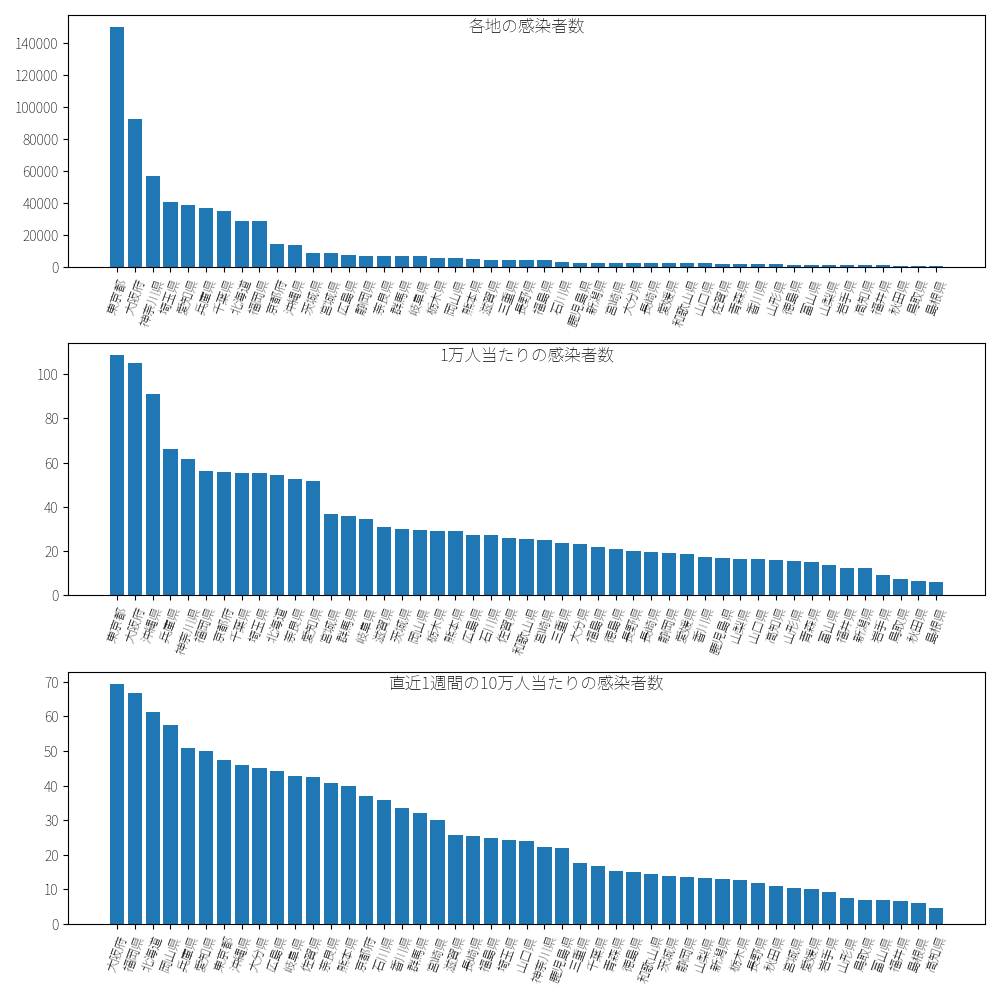

In [16]:
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(3,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


plt.subplot(3,1,3) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_100k["都道府県名"], all_jp_desc_100k["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの感染者数",y=0.9)

fig.tight_layout()


## 度数分布表

In [17]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   406.     19114.125  37822.25   56530.375  75238.5    93946.625
 112654.75  131362.875 150071.   ]


## ヒストグラム

<IPython.core.display.Javascript object>


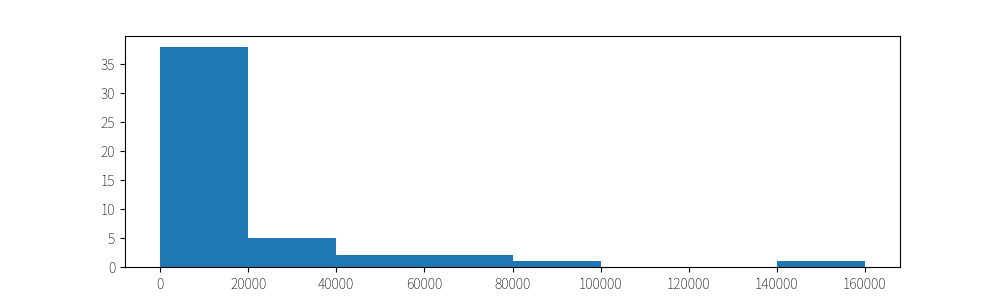

(array([38.,  5.,  2.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [18]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


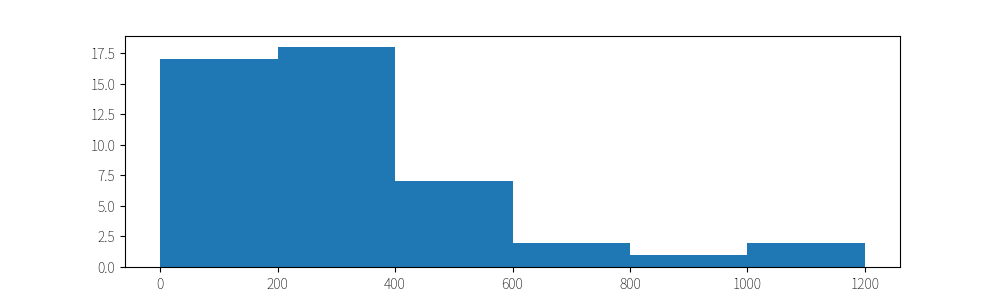

(array([17., 18.,  7.,  2.,  1.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [19]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
